In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() # TO set the default Seaborn style for graphics
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
listings = pd.read_csv('data/listings.csv')
listings.head()
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [3]:
listings['reviews_per_month'].replace('', 0 ,inplace=True)
listings['reviews_per_month'].fillna(listings['reviews_per_month'].mean(),inplace = True)

listings['host_response_rate'] = listings['host_response_rate'].str.replace("%", "").astype("float")
listings['host_response_rate'].fillna(listings['host_response_rate'].mean(),inplace = True)

listings['review_scores_rating'].replace('', 0 ,inplace=True)
listings['review_scores_rating'].fillna(listings['review_scores_rating'].mean(),inplace = True)

listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace("%", "").astype("float")
listings['host_acceptance_rate'].fillna(listings['host_acceptance_rate'].mean(),inplace = True)

#listings['host_is_superhost'].replace('f', 0 ,inplace=True)
#listings['host_is_superhost'].replace('t', 1 ,inplace=True)
listings['host_is_superhost'] = listings['host_is_superhost'].fillna('f')

rpm = pd.DataFrame(listings['reviews_per_month'])
hrr = pd.DataFrame(listings['host_response_rate'])
rsr = pd.DataFrame(listings['review_scores_rating'])
har = pd.DataFrame(listings['host_acceptance_rate'])
sh = pd.DataFrame(listings['host_is_superhost'])


# Extract only the numeric data variables
numeric_data = pd.DataFrame(listings[["reviews_per_month", "host_response_rate", "review_scores_rating", "host_acceptance_rate"]])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

,reviews_per_month,host_response_rate,review_scores_rating,host_acceptance_rate
count,3818.00,3818.00,3818.00,3818.00
mean,2.08,94.89,94.54,99.97
std,1.67,11.02,6.02,1.62
min,0.02,17.00,20.00,0.00
25%,0.83,94.89,94.00,100.00
50%,2.00,100.00,95.00,100.00
75%,2.66,100.00,98.00,100.00
max,12.15,100.00,100.00,100.00


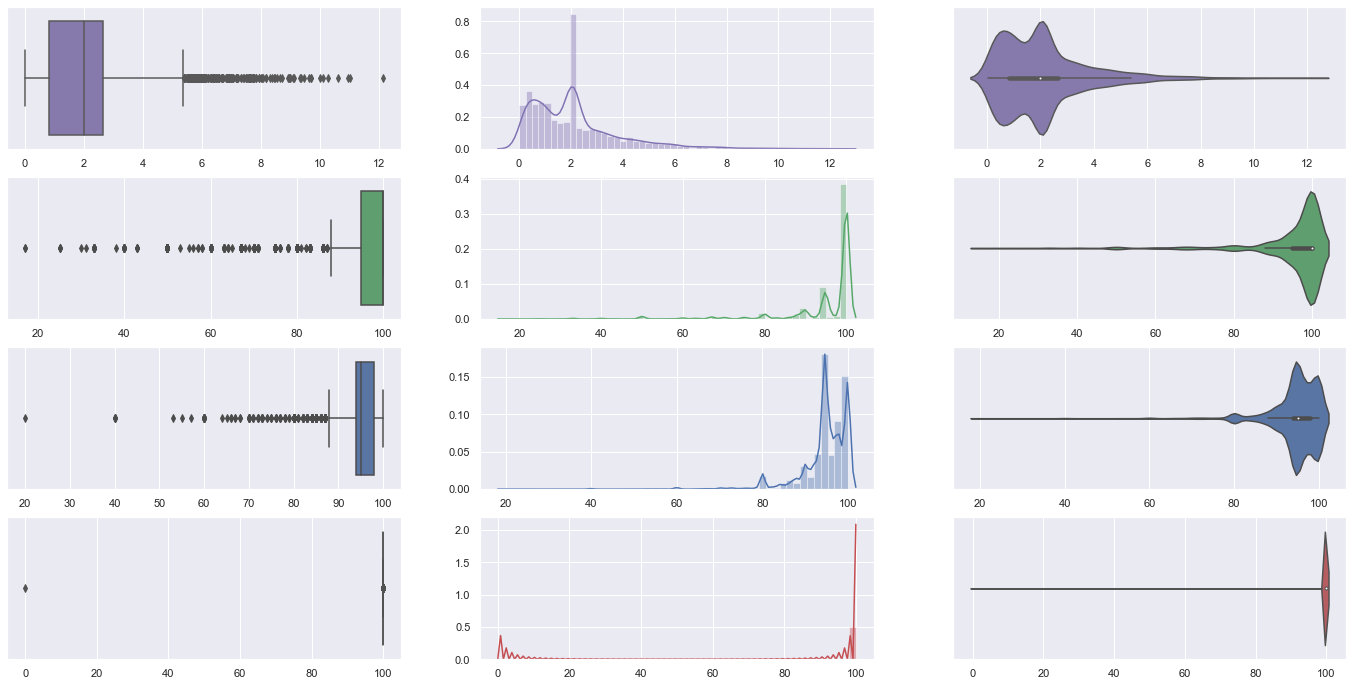

In [4]:
f, axes = plt.subplots(4,3, figsize=(24,12))


#ploting of the basic variate figures for Reviews Per Month got 3192 Entries
sb.boxplot(rpm, orient = "h", ax = axes[0,0],color = 'm')
#rpm = np.random.normal(size=3192)
sb.distplot(rpm,ax = axes[0,1],color='m');
sb.violinplot(rpm, ax = axes[0,2],color = 'm')

#ploting of the basic variate figures for Host Response Rate got 3817 Entries
#hrr = np.random.normal(size=3817) 
sb.boxplot(hrr, orient = "h", ax = axes[1,0],color = 'g')
sb.distplot(hrr,ax = axes[1,1],color='g');
sb.violinplot(hrr, ax = axes[1,2],color = 'g')

#ploting of the basic variate figures for Review Scores Rating got 3817 Entries
#rsr = np.random.normal(size=3172) 
sb.boxplot(rsr, orient = "h", ax = axes[2,0],color = 'b')
sb.distplot(rsr,ax = axes[2,1],color='b');
sb.violinplot(rsr, ax = axes[2,2],color = 'b')

#ploting of the basic variate figures for Host Acceptance rate got 3817 Entries
#har = np.random.normal(size=3172) 
sb.boxplot(har, orient = "h", ax = axes[3,0],color = 'r')
sb.distplot(har,ax = axes[3,1],color='r');
sb.violinplot(har, ax = axes[3,2],color = 'r')

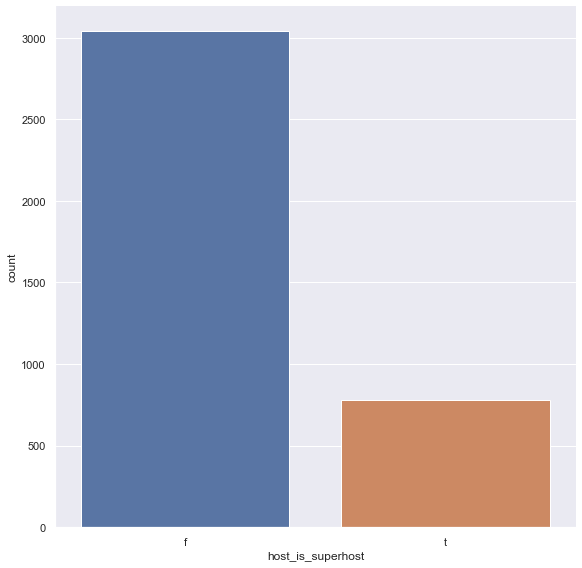

In [5]:
listings.describe()
sb.catplot(x='host_is_superhost',data = listings, kind = "count", height = 8)

In [6]:
NO = 0
YES = 0
for x in range(0,3816):
    if(listings['host_is_superhost'][x]=="t"):
        YES+=1
    elif(listings['host_is_superhost'][x]=="f"):
        NO+=1
rationo = NO/(NO+YES)
ratioyes = YES/(NO+YES)
print("Ratio of YES : NO =", YES, ":", NO)
print("Exact Ratio of YES : NO =", ratioyes, ":", rationo)
#Therefore with the counts of 0.203:0.796, it more unlikely to be superhost.

Ratio of YES : NO = 778 : 3038
Exact Ratio of YES : NO = 0.2038784067085954 : 0.7961215932914046


In [7]:
newrpm = pd.DataFrame(listings["reviews_per_month"])
quart1, quart3 = np.percentile(rpm,[25,75])
interquartile = quart3-quart1
lowerfence = quart1-(1.5*interquartile)
upperfence = quart3+(1.5*interquartile)
sorted(rpm)
newrpm.drop(newrpm[newrpm['reviews_per_month'] > upperfence ].index, inplace = True)
newrpm.drop(newrpm[newrpm['reviews_per_month'] < lowerfence ].index, inplace = True)
print("number of outlier point for reviews permonth:" ,len(rpm) - len(newrpm))

number of outlier point for reviews permonth: 200


In [8]:
newhrr = pd.DataFrame(listings["host_response_rate"])
quart1, quart3 = np.percentile(hrr,[25,75])
interquartile = quart3-quart1
lowerfence = quart1-(1.5*interquartile)
upperfence = quart3+(1.5*interquartile)
sorted(hrr)
newhrr.drop(newhrr[newhrr['host_response_rate'] > upperfence ].index, inplace = True)
newhrr.drop(newhrr[newhrr['host_response_rate'] < lowerfence ].index, inplace = True)
print("number of outlier point for host response rate:" ,len(hrr) - len(newhrr))

number of outlier point for host response rate: 411


In [9]:
newrsr = pd.DataFrame(listings["review_scores_rating"])
quart1, quart3 = np.percentile(rsr,[25,75])
interquartile = quart3-quart1
lowerfence = quart1-(1.5*interquartile)
upperfence = quart3+(1.5*interquartile)
sorted(rsr)
newrsr.drop(newrsr[newrsr['review_scores_rating'] > upperfence ].index, inplace = True)
newrsr.drop(newrsr[newrsr['review_scores_rating'] < lowerfence ].index, inplace = True)
print("number of outlier point for host review scores rating:" ,len(rsr) - len(newrsr))

number of outlier point for host review scores rating: 326


In [10]:
newhar = pd.DataFrame(listings["host_acceptance_rate"])
quart1, quart3 = np.percentile(har,[25,75])
interquartile = quart3-quart1
lowerfence = quart1-(1.5*interquartile)
upperfence = quart3+(1.5*interquartile)
sorted(har)
newhar.drop(newhar[newhar['host_acceptance_rate'] > upperfence ].index, inplace = True)
newhar.drop(newhar[newhar['host_acceptance_rate'] < lowerfence ].index, inplace = True)
print("number of outlier point for host acceptance rate:" ,len(har) - len(newhar))

number of outlier point for host acceptance rate: 774


# Univariate to superhost

In [11]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Render using graphviz
import graphviz

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.796332678454486

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.819371727748691



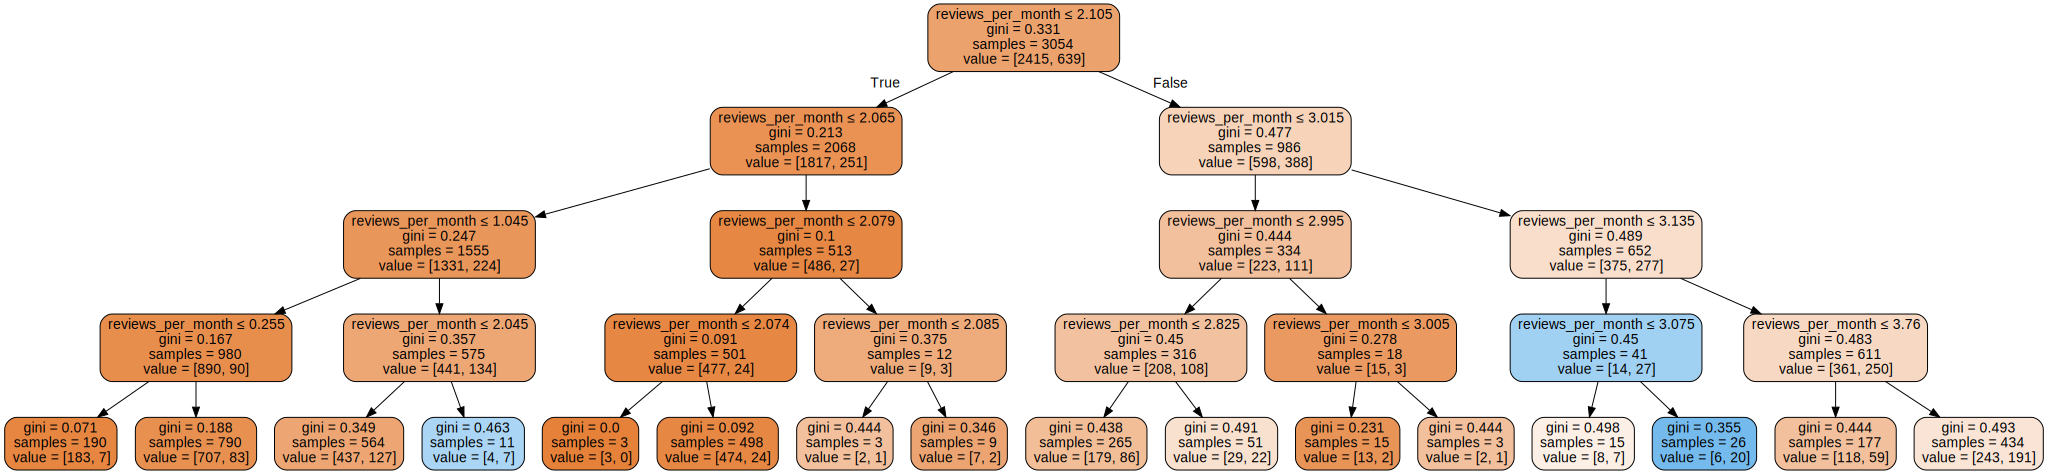

In [12]:
listings['reviews_per_month'].fillna(listings['reviews_per_month'].mean(),inplace = True)
listings['host_is_superhost'] = listings['host_is_superhost'].fillna('f')
# Recall the Banknote-Variance Dataset
uni_sh = pd.DataFrame(listings['host_is_superhost'])   # Response y
uni_rpm = pd.DataFrame(listings['reviews_per_month'])    # Predictor x

# Split the host_is_superhost-reviews_per_month Dataset into Train and Test
X_rpm_train, X_rpm_test, y_sh_train, y_sh_test = train_test_split(uni_rpm, uni_sh, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_rpm_train, y_sh_train)                    # train the decision tree model

# Predict Vairance values corresponding to Total
y_sh_V_train_pred = dectree.predict(X_rpm_train)
y_sh_V_test_pred = dectree.predict(X_rpm_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_rpm_train, y_sh_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_rpm_test, y_sh_test))
print()

# # Plot the Confusion Matrix for Train and Test
# f, axes = plt.subplots(1, 2, figsize=(12, 4))
# sb.heatmap(confusion_matrix(y_sh_train, y_sh_V_train_pred),
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
# sb.heatmap(confusion_matrix(y_sh_test, y_sh_V_test_pred), 
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_rpm_train.columns,         # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7992796332678455

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7840314136125655



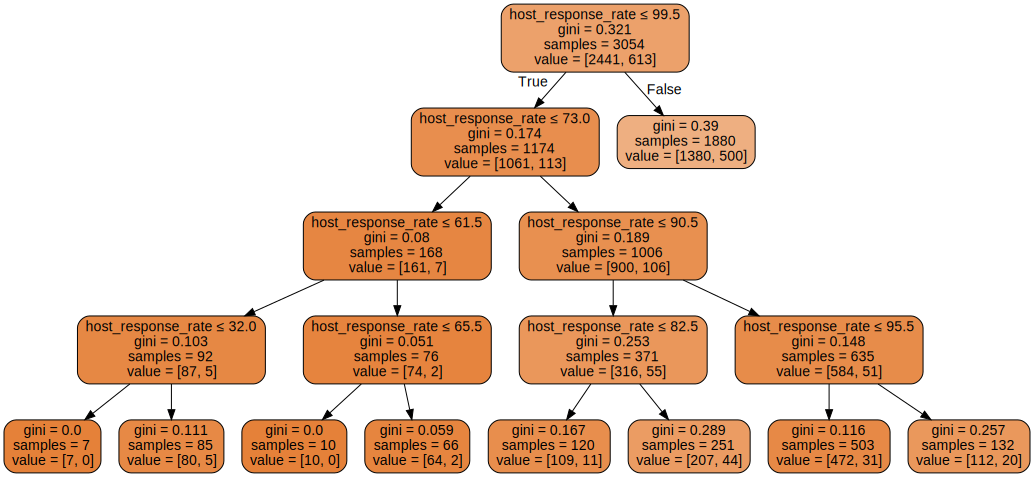

In [13]:
# Recall the SuperHost-Host_Response_Rate Dataset
uni_sh = pd.DataFrame(listings['host_is_superhost'])   # Response y
uni_rrr = pd.DataFrame(listings['host_response_rate'])    # Predictor x

# Split the host_is_superhost-reviews_per_month Dataset into Train and Test
X_rrr_train, X_rrr_test, y_sh_train, y_sh_test = train_test_split(uni_rrr, uni_sh, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_rrr_train, y_sh_train)                    # train the decision tree model

# Predict Vairance values corresponding to Total
y_sh_V_train_pred = dectree.predict(X_rrr_train)
y_sh_V_test_pred = dectree.predict(X_rrr_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_rrr_train, y_sh_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_rrr_test, y_sh_test))
print()

# # Plot the Confusion Matrix for Train and Test
# f, axes = plt.subplots(1, 2, figsize=(12, 4))
# sb.heatmap(confusion_matrix(y_sh_train, y_sh_V_train_pred),
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
# sb.heatmap(confusion_matrix(y_sh_test, y_sh_V_test_pred), 
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_rrr_train.columns,         # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8287491814014407

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8390052356020943



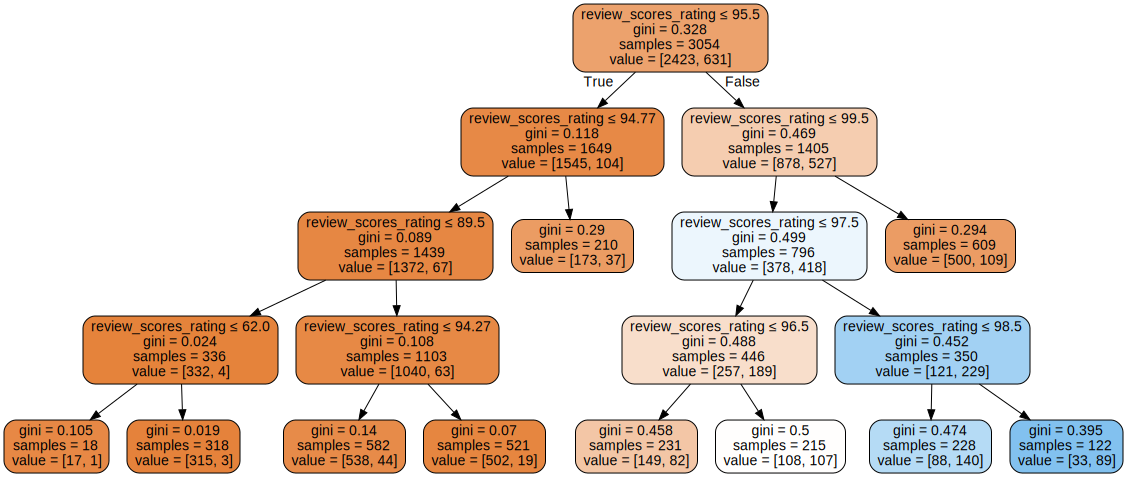

In [14]:
# Recall the SuperHost-Response_Scores_rating Dataset
uni_sh = pd.DataFrame(listings['host_is_superhost'])   # Response y
uni_rsr = pd.DataFrame(listings['review_scores_rating'])    # Predictor x

# Split the host_is_superhost-reviews_per_month Dataset into Train and Test
X_rsr_train, X_rsr_test, y_sh_train, y_sh_test = train_test_split(uni_rsr, uni_sh, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_rsr_train, y_sh_train)                    # train the decision tree model

# Predict Vairance values corresponding to Total
y_sh_V_train_pred = dectree.predict(X_rsr_train)
y_sh_V_test_pred = dectree.predict(X_rsr_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_rsr_train, y_sh_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_rsr_test, y_sh_test))
print()

# # Plot the Confusion Matrix for Train and Test
# f, axes = plt.subplots(1, 2, figsize=(12, 4))
# sb.heatmap(confusion_matrix(y_sh_train, y_sh_V_train_pred),
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
# sb.heatmap(confusion_matrix(y_sh_test, y_sh_V_test_pred), 
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_rsr_train.columns,         # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7920759659462999

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.81282722513089



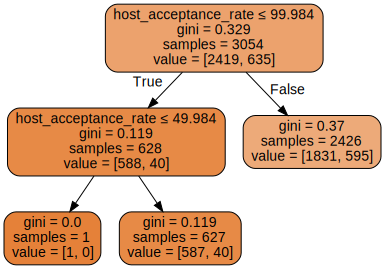

In [15]:
# Recall the SuperHost-Host_Acceptance_Rate Dataset
uni_sh = pd.DataFrame(listings['host_is_superhost'])   # Response y
uni_har = pd.DataFrame(listings['host_acceptance_rate'])    # Predictor x

# Split the host_is_superhost-reviews_per_month Dataset into Train and Test
X_har_train, X_har_test, y_sh_train, y_sh_test = train_test_split(uni_har, uni_sh, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_har_train, y_sh_train)                    # train the decision tree model

# Predict Vairance values corresponding to Total
y_sh_V_train_pred = dectree.predict(X_har_train)
y_sh_V_test_pred = dectree.predict(X_har_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_har_train, y_sh_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_har_test, y_sh_test))
print()

# # Plot the Confusion Matrix for Train and Test
# f, axes = plt.subplots(1, 2, figsize=(12, 4))
# sb.heatmap(confusion_matrix(y_sh_train, y_sh_V_train_pred),
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
# sb.heatmap(confusion_matrix(y_sh_test, y_sh_V_test_pred), 
#            annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_har_train.columns,         # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

# MultiVariate

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import graphviz

In [17]:
# a) Partition data randomly into Train and Test set 8:2.
predictorSet = pd.DataFrame(listings[['reviews_per_month', 'host_response_rate', 'review_scores_rating', 'host_acceptance_rate']])
responseSet = pd.DataFrame(listings[['host_is_superhost']])
numericTrainSet, numericTestSet, y_train, y_test = train_test_split(predictorSet, responseSet, train_size=0.8)
print("Train Set :", y_train.shape, numericTrainSet.shape)
print("Test Set  :", y_test.shape, numericTestSet.shape)

Train Set : (3054, 1) (3054, 4)
Test Set  : (764, 1) (764, 4)


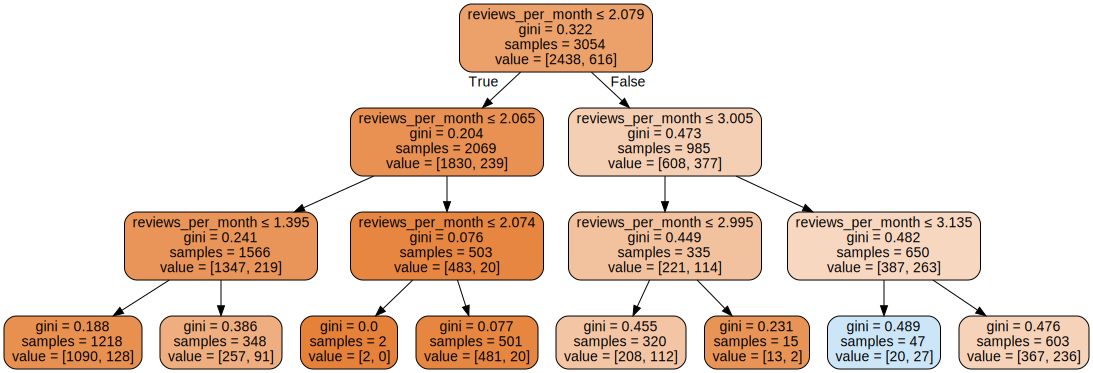

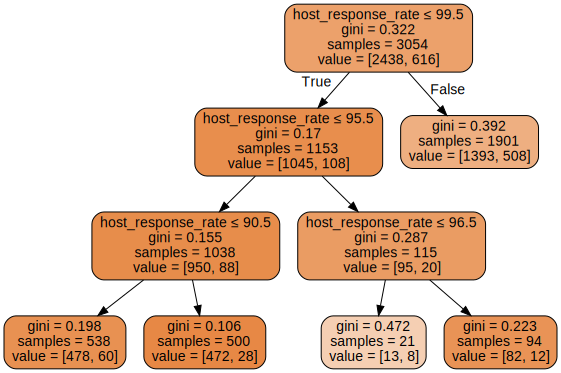

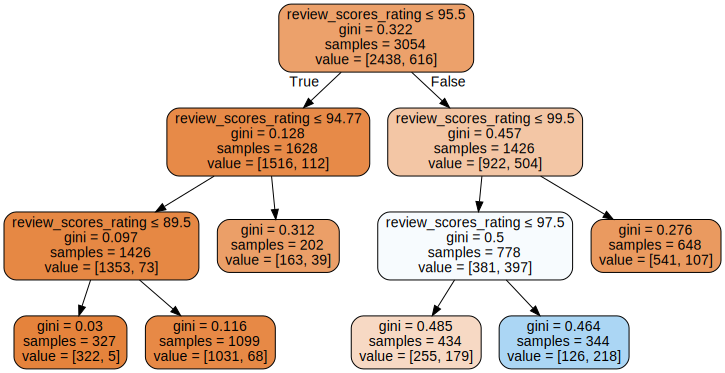

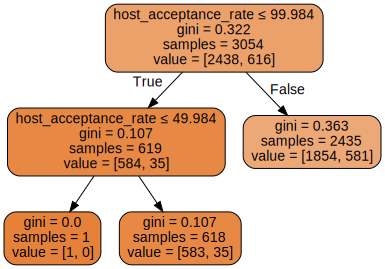

In [18]:
# Training Decision Tree model
dectrees = []
dectree = DecisionTreeClassifier(max_depth = 3)

count = 0
for var in numericTrainSet:
    X_train = numericTrainSet[[var]]
    dectrees.insert(count, dectree.fit(X_train, y_train))
    treedot = export_graphviz(dectree,
                          feature_names = X_train.columns,
                          out_file = None,
                          filled = True,
                          rounded = True,
                          special_characters = True)
    display(graphviz.Source(treedot))
    count += 1

Train set
---------------------------------------------------------


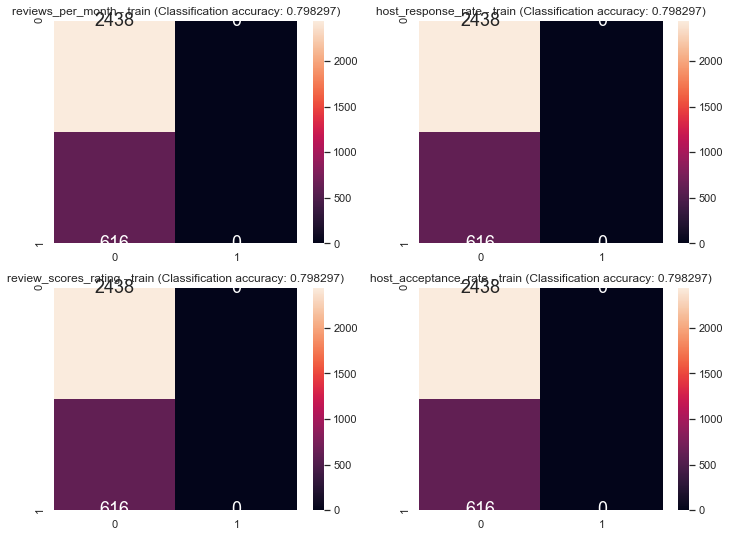

Test set
---------------------------------------------------------


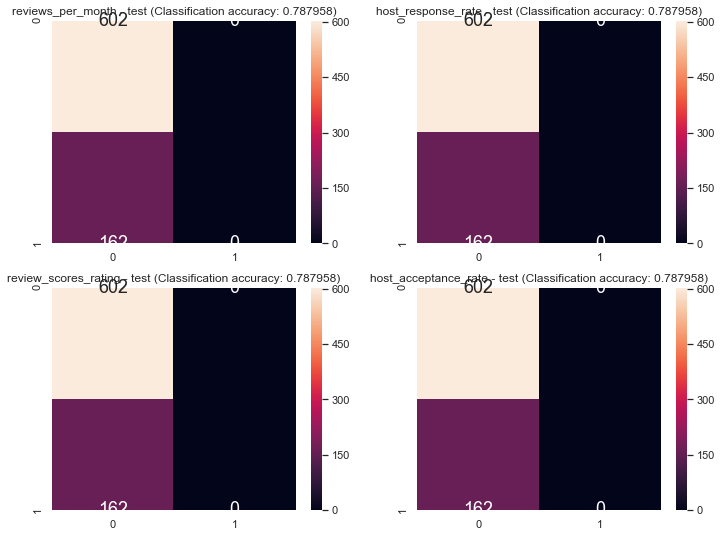

In [19]:
# b) Predict Banknote using each of the four models
print('Train set\n---------------------------------------------------------')
count = 0
f, axes = plt.subplots(2, 2, figsize=(12, 9))

for var in numericTrainSet:
    dectree = dectrees[count]
    X_train = numericTrainSet[[var]]
    y_train_pred = dectree.predict(X_train)
    
    # Plot the Confusion Matrix
    axis = axes[count//2,count%2]
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axis)
    axis.set_title("%s - train (Classification accuracy: %f)" % (var, dectree.score(X_train, y_train)))
    count += 1

plt.show()

print('Test set\n---------------------------------------------------------')

count = 0
f, axes = plt.subplots(2, 2, figsize=(12, 9))
for var in numericTestSet:
    dectree = dectrees[count]
    X_test = numericTestSet[[var]]
    y_test_pred = dectree.predict(X_test)

    # Plot the Confusion Matrix
    axis = axes[count//2,count%2]
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axis)
    axis.set_title("%s - test (Classification accuracy: %f)" % (var, dectree.score(X_test, y_test)))
    count += 1
plt.show()

In [20]:
# a) Train and fit the multi-variate decision tree
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(numericTrainSet, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8457760314341847

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.849476439790576



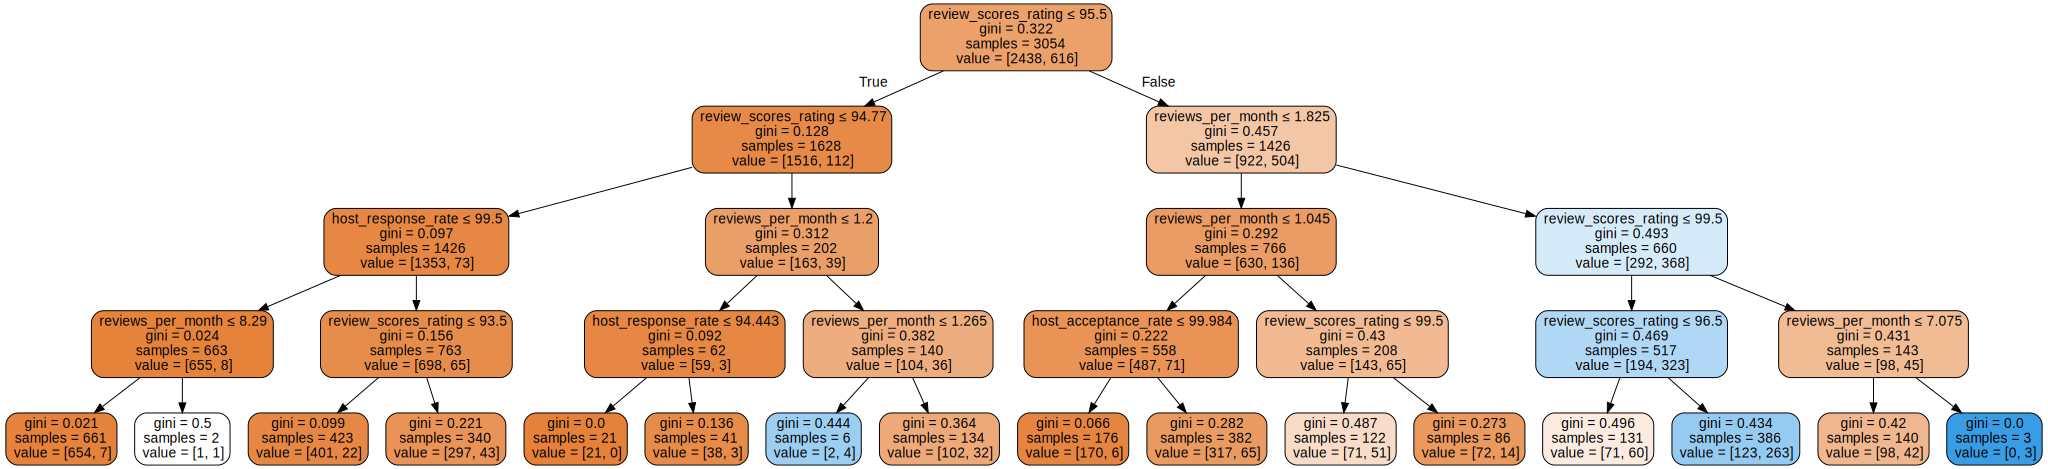

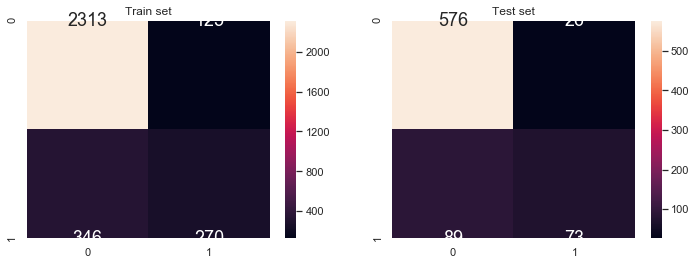

In [21]:
# b) Predict Banknote using the model and show confusion matrix and
#    print classification accuracy

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(numericTrainSet)
y_test_pred = dectree.predict(numericTestSet)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(numericTrainSet, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(numericTestSet, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
matrix1 = confusion_matrix(y_train, y_train_pred)
sb.heatmap(matrix1,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title("Train set")
matrix2 = confusion_matrix(y_test, y_test_pred)
sb.heatmap(matrix2, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title("Test set")


# Plot the Decision Tree
treedot = export_graphviz(dectree,
                          feature_names = numericTrainSet.columns,
                          out_file = None,
                          filled = True,
                          rounded = True,
                          special_characters = True)

graphviz.Source(treedot)

In [22]:
# False positives in train set
count = 0
train_fp = []
for i, row in enumerate(y_train.values):
    if (y_train_pred[count] == 't' and row == 'f'):
        new_row = listings.iloc[y_train.index[i]].copy()
        new_row['Predicted'] = y_train_pred[count]
        train_fp.append(new_row)
    count += 1
    
# False negatives in train set
count = 0
train_fn = []
for i, row in enumerate(y_train.values):
    if (y_train_pred[count] == 'f' and row == 't'):
        new_row = listings.iloc[y_train.index[i]].copy()
        new_row['Predicted'] = y_train_pred[count]
        train_fn.append(new_row)
    count += 1
    
# False positives in test set
count = 0
test_fp = []
for i, row in enumerate(y_test.values):
    if (y_test_pred[count] == 't' and row == 'f'):
        new_row = listings.iloc[y_test.index[i]].copy()
        new_row['Predicted'] = y_test_pred[count]
        test_fp.append(new_row)
    count += 1

# False negatives in test set
count = 0
test_fn = []
for i, row in enumerate(y_test.values):
    if (y_test_pred[count] == 'f' and row == 't'):
        new_row = listings.iloc[y_test.index[i]].copy()
        new_row['Predicted'] = y_test_pred[count]
        test_fn.append(new_row)
    count += 1

In [23]:
#Print the exact FPR and FNR values
matrixtrain = confusion_matrix(y_train, y_train_pred)
matrixtest = confusion_matrix(y_test, y_test_pred)
falsepr_train = matrixtrain[0][1] / (matrixtrain[0][0] + matrixtrain[0][1])
falsenr_train = matrixtrain[1][0] / (matrixtrain[1][0] + matrixtrain[1][1])
print("FPR (Train):\t", falsepr_train)
print("FNR (Train):\t", falsenr_train)

falsepr_test = matrixtest[0][1] / (matrixtest[0][0] + matrixtest[0][1])
falsenr_test = matrixtest[1][0] / (matrixtest[1][0] + matrixtest[1][1])
print("FPR (Test):\t", falsepr_test)
print("FNR (Test):\t", falsenr_test)

FPR (Train):	 0.05127153404429861
FNR (Train):	 0.5616883116883117
FPR (Test):	 0.04318936877076412
FNR (Test):	 0.5493827160493827


In [24]:
# Print False Postive cases in Train and Test dataset
df_fpTrain = pd.DataFrame(train_fp)
df_fnTrain = pd.DataFrame(train_fn)
df_fpTest = pd.DataFrame(test_fp)
df_fnTest = pd.DataFrame(test_fn)

In [25]:
print("False Positives (Train) \t Count: ", len(df_fpTrain))
df_fpTrain

False Positives (Train) 	 Count:  125


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Predicted
2713,4679983,https://www.airbnb.com/rooms/4679983,20160104002432,2016-01-04,Sleep and work space in downtown,We've converted our old apartment into a live/...,This apartment has awesome accessibility to do...,We've converted our old apartment into a live/...,none,Capital Hill is incredible. So close to downto...,...,f,NaN,WASHINGTON,f,flexible,f,f,3,2.01,t
2386,7239217,https://www.airbnb.com/rooms/7239217,20160104002432,2016-01-04,Cottage on the Park - West Seattle,This small cottage is situated with a park on ...,"This small, quaint 1940s cottage is fully furn...",This small cottage is situated with a park on ...,none,This house has a very unique location in the n...,...,f,NaN,WASHINGTON,f,moderate,f,f,1,2.17,t
1728,6554352,https://www.airbnb.com/rooms/6554352,20160104002432,2016-01-04,Modern Home in West Seattle,One bedroom with private bath and separate bon...,This home is located right off of California A...,One bedroom with private bath and separate bon...,none,Our neighborhood is so fantastic because it is...,...,f,NaN,WASHINGTON,f,flexible,f,f,1,2.13,t
2673,7775663,https://www.airbnb.com/rooms/7775663,20160104002432,2016-01-04,Bright Loft in the Heart of Seattle,"This 750sq foot, lofted one bedroom apartment ...",NaN,"This 750sq foot, lofted one bedroom apartment ...",none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,3.52,t
1913,4271174,https://www.airbnb.com/rooms/4271174,20160104002432,2016-01-04,Magnolia Midcentury Private Den,Our cute Magnolia house is just minutes from d...,Our space has a twin bed and super comfy secti...,Our cute Magnolia house is just minutes from d...,none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,3.91,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,5632713,https://www.airbnb.com/rooms/5632713,20160104002432,2016-01-04,Ballard Backyard RV,You'll enjoy the solitude and value of this ba...,We want you to be able to get a good feel for ...,You'll enjoy the solitude and value of this ba...,none,Ballard is a completely hip neighborhood and t...,...,f,NaN,WASHINGTON,f,flexible,f,f,1,3.10,t
1078,9294683,https://www.airbnb.com/rooms/9294683,20160104002432,2016-01-04,Pike Place Market - Art Gallery,- Downtown Seattle - 1 block from Pike Place ...,- Downtown Seattle - 1 block from Pike Place M...,- Downtown Seattle - 1 block from Pike Place ...,none,"If you're traveling to Seattle, this is exactl...",...,f,NaN,WASHINGTON,t,moderate,f,f,2,7.78,t
494,6724599,https://www.airbnb.com/rooms/6724599,20160104002432,2016-01-04,Charming Daylight Basement of DINKS,The basement is not underground. It's half a l...,It's spacious. My hubby and I live above. We a...,The basement is not underground. It's half a l...,none,The neighborhood is amazing. Quiet Resi and ne...,...,f,NaN,WASHINGTON,f,moderate,f,f,1,1.93,t
1953,6105021,https://www.airbnb.com/rooms/6105021,20160104002432,2016-01-04,SEATTLE LOFT STUDIO,"An oasis just five minutes from downtown, this...","This loft studio is a unique, tranquil space h...","An oasis just five minutes from downtown, this...",none,Beacon Hill is one of the most diverse neighbo...,...,f,NaN,WASHINGTON,f,strict,f,f,1,3.25,t


In [26]:
print("False Negatives (Train) \t Count: ", len(df_fnTrain))
df_fnTrain

False Negatives (Train) 	 Count:  346


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Predicted
3169,6584984,https://www.airbnb.com/rooms/6584984,20160104002432,2016-01-04,Seattle near space needle,Location!! A half mile from space needle in lo...,This apartment is at the end of a street at a ...,Location!! A half mile from space needle in lo...,none,This is a very quiet neighborhood as not near ...,...,f,NaN,WASHINGTON,f,moderate,f,f,1,2.078919,f
510,6466129,https://www.airbnb.com/rooms/6466129,20160104002432,2016-01-04,Enjoy our Cozy Waterfront nook! MIL,"Enjoy this beautiful, cozy, very private mothe...","Beautiful mother-in-law, in the home basement ...","Enjoy this beautiful, cozy, very private mothe...",none,NaN,...,f,NaN,WASHINGTON,f,strict,f,f,1,5.620000,f
2618,1768883,https://www.airbnb.com/rooms/1768883,20160104002432,2016-01-04,Bright + Colorful in Capitol Hill,This two bedroom apartment sits high above the...,"A few notes on our home: - It's our home, we l...",This two bedroom apartment sits high above the...,none,The house is located smack in the middle of th...,...,f,NaN,WASHINGTON,f,strict,f,f,2,0.220000,f
2300,6716874,https://www.airbnb.com/rooms/6716874,20160104002432,2016-01-04,Brand New Daylight Apartment,We've created a brand new apartment with all t...,This is a newly created daylight basement apar...,We've created a brand new apartment with all t...,none,Stroll through our neighborhood of stately hom...,...,f,NaN,WASHINGTON,f,strict,f,f,2,3.050000,f
1537,1954452,https://www.airbnb.com/rooms/1954452,20160104002432,2016-01-04,99 Downtown Walkscore Lux 1BD,The building is right on the border of Capitol...,This suite is on the border of downtown and ca...,The building is right on the border of Capitol...,none,Our favorite thing about this area is that unl...,...,f,NaN,WASHINGTON,f,strict,t,t,3,3.030000,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,8052542,https://www.airbnb.com/rooms/8052542,20160104002432,2016-01-04,Downtown Seattle Pike Place Market,"A modern 1b1b apartment, in the heart of Seatt...","A modern, clean and maintained 1b1b, in the he...","A modern 1b1b apartment, in the heart of Seatt...",none,"This is the heart of Seattle, the cross-sectio...",...,f,NaN,WASHINGTON,f,flexible,f,f,2,0.670000,f
1230,6766708,https://www.airbnb.com/rooms/6766708,20160104002432,2016-01-04,100 Walk Score - Lux 2Bed,"With an unbeatable 100 Walkscore, this luxurio...",The building is very modern and has a gym and ...,"With an unbeatable 100 Walkscore, this luxurio...",none,NaN,...,f,NaN,WASHINGTON,f,strict,t,t,3,0.450000,f
110,3979496,https://www.airbnb.com/rooms/3979496,20160104002432,2016-01-04,Large bright room & TV in Seattle,A spacious room just a short walk from all tha...,"A comfy double futon in a light, bright baseme...",A spacious room just a short walk from all tha...,none,"In Seattle, neighbourhoods are everything and ...",...,f,NaN,WASHINGTON,f,moderate,f,f,1,1.890000,f
3331,9595087,https://www.airbnb.com/rooms/9595087,20160104002432,2016-01-04,Sunny 3bd townhouse with parking,"3 bedrooms, 2 full bathrooms. Lots of natural ...",Our sunny townhouse is looking forward to welc...,"3 bedrooms, 2 full bathrooms. Lots of natural ...",none,NaN,...,f,NaN,WASHINGTON,f,strict,f,f,1,2.078919,f


In [27]:
print("False Positives (Test) \t Count: ", len(df_fpTest))
df_fpTest

False Positives (Test) 	 Count:  26


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Predicted
1463,4516960,https://www.airbnb.com/rooms/4516960,20160104002432,2016-01-04,"Seattle Downtown Core, Pike Market",Thoughtful blend of architectural design mixed...,Beautiful loft space that was featured in Seat...,Thoughtful blend of architectural design mixed...,none,Located in Westlake Park (the town square of S...,...,f,NaN,WASHINGTON,f,moderate,f,f,1,4.44,t
785,7153101,https://www.airbnb.com/rooms/7153101,20160104002432,2016-01-04,New Spacious Private Home UW Lake U,"Perfect Location: Center of East L./Greenlake,...",- The Home (land not included) is ~1300 SQ Fee...,"Perfect Location: Center of East L./Greenlake,...",none,*ALSO SEE AIRBNB GUEST GUIDEBOOK FOR MORE DETA...,...,f,NaN,WASHINGTON,f,strict,f,f,2,5.80,t
2122,6561379,https://www.airbnb.com/rooms/6561379,20160104002432,2016-01-04,Beacon Hill 2br with Park Views,Right across the street from Jefferson Park in...,This 1953 rambler-style house is a great home ...,Right across the street from Jefferson Park in...,none,The neighborhood is safe with plenty of family...,...,f,NaN,WASHINGTON,f,moderate,f,f,2,2.26,t
772,7988337,https://www.airbnb.com/rooms/7988337,20160104002432,2016-01-04,Charming 1920s Unit in U-District,This charming 1920s unit in the U-District has...,This is a great space to be close to the city'...,This charming 1920s unit in the U-District has...,none,The U-District is a diverse neighborhood that ...,...,f,NaN,WASHINGTON,t,flexible,f,f,1,3.44,t
1510,8704438,https://www.airbnb.com/rooms/8704438,20160104002432,2016-01-04,View Apt Near CONVENTION CENTER!,This modern apartment has amazing downtown vie...,Along with all the modern appliances there is ...,This modern apartment has amazing downtown vie...,none,NaN,...,f,NaN,WASHINGTON,f,strict,f,f,2,2.64,t
1908,5958194,https://www.airbnb.com/rooms/5958194,20160104002432,2016-01-04,"Single Room, Contemporary New House",We live in a vibrant and beautiful neighborhoo...,The room is large with high ceiling and roomy ...,We live in a vibrant and beautiful neighborhoo...,none,"Vibrant, young, and small town feel in a big c...",...,f,NaN,WASHINGTON,f,moderate,f,f,4,3.15,t
2249,8902887,https://www.airbnb.com/rooms/8902887,20160104002432,2016-01-04,"Bright 1 bed Columbia City, Seattle",A spacious 1 bed mother-in-law space with priv...,"Modern, spacious mother-in-law apartment in th...",A spacious 1 bed mother-in-law space with priv...,none,"Columbia City is a vibrant, diverse area south...",...,f,NaN,WASHINGTON,f,flexible,f,f,1,2.73,t
161,63733,https://www.airbnb.com/rooms/63733,20160104002432,2016-01-04,Seattle- Ballard Guestsuite -,The hostess introduced the Bed and Breakfast c...,Welcome! You have found the Best Value in Sea...,The hostess introduced the Bed and Breakfast c...,none,It is a quiet residential neighborhood with si...,...,f,NaN,WASHINGTON,f,moderate,f,t,1,2.18,t
1640,8065531,https://www.airbnb.com/rooms/8065531,20160104002432,2016-01-04,Private room near Convention Center,"Located on Capitol Hill/First Hill, this beaut...","Beautifully furnished, with everything you'll ...","Located on Capitol Hill/First Hill, this beaut...",none,This is truly the best neighborhood to be in. ...,...,f,NaN,WASHINGTON,f,strict,f,f,3,2.86,t
828,4623541,https://www.airbnb.com/rooms/4623541,20160104002432,2016-01-04,"Spacious 2BR/2.5 bath, gr8 location","Beautifully appointed 2 BR, 2.5 bath townhome ...",NaN,"Beautifully appointed 2 BR, 2.5 bath townhome ...",none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,1.94,t


In [28]:
print("False Negatives (Test) \t Count: ", len(df_fnTest))
df_fnTest

False Negatives (Test) 	 Count:  89


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Predicted
2838,2628010,https://www.airbnb.com/rooms/2628010,20160104002432,2016-01-04,Huge 2 BR/2 Bath-Heart of Cap Hill,"Amazing 2 Bedroom, 2 Bathroom Apartment on Cap...",2 huge bedrooms Both bedrooms have queen size ...,"Amazing 2 Bedroom, 2 Bathroom Apartment on Cap...",none,Capitol Hill is a fantastic neighborhood in Se...,...,f,NaN,WASHINGTON,t,strict,f,f,1,1.48,f
537,783061,https://www.airbnb.com/rooms/783061,20160104002432,2016-01-04,Comfortable Green Lake Home Base,NaN,I love the Green Lake neighborhood and have li...,I love the Green Lake neighborhood and have li...,none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,2,0.90,f
2530,1450262,https://www.airbnb.com/rooms/1450262,20160104002432,2016-01-04,Executive Retreat,"Our 2,500 sq ft home tucked in a quiet, peacef...","A beautifully furnished, spacious open floor p...","Our 2,500 sq ft home tucked in a quiet, peacef...",none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,0.86,f
895,1826155,https://www.airbnb.com/rooms/1826155,20160104002432,2016-01-04,"Seattle ""Sweet Suite"" Cherry Hill","""Bed Baked and Beyond: Cherry Hill"" is an eleg...","A 1903, Victorian home with plenty of modern c...","""Bed Baked and Beyond: Cherry Hill"" is an eleg...",none,Seattle's Cherry Hill neighborhood still refle...,...,f,NaN,WASHINGTON,f,strict,f,f,5,3.11,f
2430,5319948,https://www.airbnb.com/rooms/5319948,20160104002432,2016-01-04,Cozy charmer w/ sunroom and park,"Enjoy the comforts of living in a warm, quiet ...",The room is the only one on the main floor so ...,"Enjoy the comforts of living in a warm, quiet ...",none,Maple Leaf is an unusual oasis in Seattle with...,...,f,NaN,WASHINGTON,f,moderate,f,f,1,1.05,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,4574039,https://www.airbnb.com/rooms/4574039,20160104002432,2016-01-04,Amazing Designer Dowtown Loft,"With 16 ft ceilings and dramatic design, our l...",Our loft is gem in an urban setting. Featured ...,"With 16 ft ceilings and dramatic design, our l...",none,Located in historic Pioneer Square it is easil...,...,f,NaN,WASHINGTON,f,strict,f,f,2,3.38,f
197,3835995,https://www.airbnb.com/rooms/3835995,20160104002432,2016-01-04,Ballard Craftsman Charmer,Centrally located minutes from downtown Ballar...,"Private entrance with lock box, on-site parkin...",Centrally located minutes from downtown Ballar...,none,Quiet neighborhood and very walkable to grocer...,...,f,NaN,WASHINGTON,f,flexible,f,f,1,9.14,f
1911,6958603,https://www.airbnb.com/rooms/6958603,20160104002432,2016-01-04,Rooftop Room with a View !,Newly remodeled roof top room with a deck . Th...,This is a funny little space ! Kinda like a ti...,Newly remodeled roof top room with a deck . Th...,none,We are very centrally located between Ballard ...,...,f,NaN,WASHINGTON,f,strict,t,t,5,4.36,f
659,2484067,https://www.airbnb.com/rooms/2484067,20160104002432,2016-01-04,Cozy Private Home near the Lake #1,Private downstairs of a Madrona home (complete...,Welcome to your own private suite in the beaut...,Private downstairs of a Madrona home (complete...,none,Madrona is a neighborhood in Seattle located e...,...,f,NaN,WASHINGTON,f,moderate,f,f,2,1.41,f


In [32]:
custom_set = pd.DataFrame([
{"reviews_per_month": 6.42, 'host_response_rate': 100.0, 'review_scores_rating': 100.000000, 'host_acceptance_rate': 100.0,},
{'reviews_per_month': 2.10, 'host_response_rate': 90.0, 'review_scores_rating': 96.0, 'host_acceptance_rate': 85.0,},
{'reviews_per_month': 2.12, 'host_response_rate': 0.0, 'review_scores_rating': 97.0, 'host_acceptance_rate': 0.0,},
{'reviews_per_month': 1.12, 'host_response_rate': 17.0, 'review_scores_rating': 32.0, 'host_acceptance_rate': 20.0,},
{'reviews_per_month': 2.12, 'host_response_rate': 98.0, 'review_scores_rating': 98.0, 'host_acceptance_rate': 100.0,}])
custom_set

,reviews_per_month,host_response_rate,review_scores_rating,host_acceptance_rate
0,6.42,100.0,100.0,100.0
1,2.10,90.0,96.0,85.0
2,2.12,0.0,97.0,0.0
3,1.12,17.0,32.0,20.0
4,2.12,98.0,98.0,100.0


# for it to predict as true
# The review_per_month more than 2.1, review_scores_rating need to be 97% and above as they also have a higher classification
# than the remaining 2

In [33]:
custom_set['Predicted'] = dectree.predict(custom_set)

In [34]:
custom_set

,reviews_per_month,host_response_rate,review_scores_rating,host_acceptance_rate,Predicted
0,6.42,100.0,100.0,100.0,f
1,2.10,90.0,96.0,85.0,f
2,2.12,0.0,97.0,0.0,t
3,1.12,17.0,32.0,20.0,f
4,2.12,98.0,98.0,100.0,t
